# 关于模块化

- 模块化的概念从有计算机语言与程序依赖，一直都存在，但是我们这里指的模块化是指文件模块化，这是通用的模块化内涵：
    - 函数模块化
    - 类模块化
    - 文件模块化
- 其他语言的模块化：
    - Java的import与package
    - C/C++语言的动态库与静态库
    - Python的import与目录`__init__.py`文件
- 早期从HTML发展到Javascript，本身是提供模块化语法机制的
    - 从HTML引入多个Javascript，采用`<script>`标签的src属性可以引入多个Javascript文件；
    
- 因为Javascript早期是服务与依赖HTML文件，纯粹的Javascript语言从发展开始本身没有提供模块化的语法机制，在ES发展之前，模块化问题导致很多问题：
    - 繁琐；
    - 代码污染；
    - 命名冲突；
    - 加载顺序与依赖关系混乱等；

- 模块化的发展
    1. 函数与闭包模块化；
    2. 类模块化；
    3. 类模块化框架（早期雅虎研发的YUI）；
    4. Node.js最早提出的CommonJS方案；
        - 局限：Node.js是服务器运行环境，这意味着CommonJS方案智能服务器端实现；
    5. AMD和RequireJS
        - AMD：Asynchronous Module Definition：一套抽象的约束定义；
        - RequireJS是AMD的落地实现框架；
    6. CMD和SeaJs
        - CMD：Common Module Definition，国内阿里仿照（据说是启发）AMD与CommonJS实现的一套规范；
        - SeaJs是CMD的实现；
    7. ES6的模块化
        - ES6从语法规范解决了模块化（2015年），问题是目前Node.js运行环境下import支持需要特殊的要求。
        - import作为关键字被引入ES6语法。

- CommonJS与ES6模块化的主要区别
    1. CommonJS 模块输出的是一个值的拷贝，ES6 模块输出的是值的引用。
    2. CommonJS 模块是运行时加载，ES6 模块是编译时输出接口。

# require的使用

- require函数是实现模块化的应用函数（CommonJS方式，Node.js早期提出的实现）；
    - `require(id)`
        - id: 模块名或者路径；（原生模块使用id名，文件模块使用文件路径）
        - 返回导入的模块内容（深拷贝）

## 模块的定义

### module对象

- Node.j提供一个内置对象module，表示当前模块的引用；

- module对象的可阅读字符串输出为：

```shell
Module {
  id: '.',
  exports: {},
  parent: null,
  filename: '/Users/yangqiang/Documents/09Web/study/nod_demo/n04_module_03call.js',
  loaded: false,
  children: [],
  paths: 
   [ '/Users/yangqiang/Documents/09Web/study/nod_demo/node_modules',
     '/Users/yangqiang/Documents/09Web/study/node_modules',
     '/Users/yangqiang/Documents/09Web/node_modules',
     '/Users/yangqiang/Documents/node_modules',
     '/Users/yangqiang/node_modules',
     '/Users/node_modules',
     '/node_modules' ] }
```

- module对象的属性：
    - id属性：模块名或者路径；
    - exports属性：导出的内容；
        - 这个属性是字典类型，单独一个对象也可以直接作为字典；
    - parent/children属性：用来维护模块的嵌套加载；
    - loaded属性：模块的加载状态
    - filename/paths属性：模块文件名与支持的搜索路径；

### module.exports与require

- exports指定导出的内容，require返回导出的内容；可以支持的有：
    1. 导出变量；
    2. 导出函数；
    3. 导出类；
    4. 导出对象变量；
    

#### 导出的例子

```javascript

    var v_a = "导出的变量";  

    function mod_func(){
        console.log("导出的函数");
    }

    function cls_a(){
        this.m_a = 20;
        this.func = function(){
            console.log("成员函数！");
        }
    }

    var obj_a = new cls_a();

    module.exports = {
        o_1 : v_a,
        o_2 : mod_func,
        o_3 : cls_a,
        o_4 : obj_a
    }

```

#### 加载导出的例子

```javascript

    var m = require("./n04_module_01exports");

    console.log(m.o_1);  // 输出1
    m.o_2();   // 输出2

    var m_o = new m.o_3();
    console.log(m_o.m_a);   // 输出3
    m_o.func();

    console.log(m.o_4.m_a);  // 输出4
    m.o_4.func();

```

#### exports字典的另外一种方式

```javascript

    var v_a = "导出的变量";  

    function mod_func(){
        console.log("导出的函数");
    }

    function cls_a(){
        this.m_a = 20;
        this.func = function(){
            console.log("成员函数！");
        }
    }

    var obj_a = new cls_a();
    // 需要引号
    module.exports["o_1"] = v_a;
    module.exports["o_2"] = mod_func;
    module.exports["o_3"] = cls_a;
    module.exports["o_4"] = obj_a;

```

#### module.exports中需要注意的情况

1. exportsda单绑定

```javascript
    const EventEmitter = require('events');

    module.exports = new EventEmitter();     // 单绑定

    // 处理一些工作，并在一段时间后从模块自身触发 'ready' 事件。
    setTimeout(() => {
      module.exports.emit('ready');          // 直接使用exports调用。
    }, 1000);
```

2. 绑定必须在加载的时候，不能再运行的时候
    - 不能在回调函数中绑定

```javascript
    setTimeout(() => {
      module.exports = { a: 'hello' };
    }, 0);
```

### 全局变量exports

- exports全局变量是module.exports的快捷调用。
    - 其实在模块执行之前，exports变量的内容会被赋值给module.exports属性，从而这两者之间本质是一致的。
    - 下面是一个例子：

```javascript
    var v_a = "导出的变量";  

    function mod_func(){
        console.log("导出的函数");
    }

    function cls_a(){
        this.m_a = 20;
        this.func = function(){
            console.log("成员函数！");
        }
    }

    var obj_a = new cls_a();
    exports["o_1"] = v_a;
    exports["o_2"] = mod_func;
    exports["o_3"] = cls_a;
    exports["o_4"] = obj_a;

```

# import的使用

- 由于CommonJS与ES6的模块化不兼容，所以使用import/export与require/module存在差别；
    - 定义给require引用的模块，不能使用import引用；
    - ES6中模块为了解决这种兼容问题，在规范上规定：import引入的模块文件扩展名必须是`.jsx`

## import语句

```javascript
ImportDeclaration:
    import   ImportClause   FromClause;
    import   ModuleSpecifier;

```

- 说明：
    - import支持两种语法风格
        1. import  import从句   from从句
            - from从句：
                - from 模块说明符
            - import从句：
                - ImportedDefaultBinding
                    - 缺省绑定引入（绑定标识字，yield， await）；
                - NameSpaceImport
                    - 命名空间引入（* as 绑定标识字，yield， await）；
                - NamedImports
                    - 命名引入；
                        - {}
                        - {ImportsList}
                        - {ImportsList,}
                - ImportedDefaultBinding, NameSpaceImport
                    - 混合引入
                - ImportedDefaultBinding, NamedImports
                    - 混合引入
        2. import 模块说明符
        
    - 

## export语句

```javascript
    export ExportFromClause FromClause;
    export NamedExports;
    export VariableStatement[~Yield, ~Await]
    export Declaration[~Yield, ~Await]
    export default HoistableDeclaration[~Yield, ~Await, +Default]
    export default ClassDeclaration[~Yield, ~Await, +Default]
```

- 说明：
    - ExportFromClause
        - `*`
        - `* as IdentifierName`
        - `NamedExports`
    - NamedExports;
        -  {}
        - {ExportsList}
        - {ExportsList,}

- 上面的语法结构采用比较严谨的定义方式，但是比较晦涩不易于阅读，后面通过例子来理解。

### 模块的定义

- 一个模块就是一个独立的文件。该文件内部定义的内容（变量、对象、函数、类等），如果希望外部能够访问模块内部的内容，需要使用export关键字导出希望提供给外部访问的内容。

```javascript
    var v_a = "导出的变量";  

    function mod_func(){
        console.log("导出的函数");
    }

    function cls_a(){
        this.m_a = 20;
        this.func = function(){
            console.log("成员函数！");
        }
    }

    var obj_a = new cls_a();

    export default {
        mod_func,
        v_a,
        mod_cls:cls_a,
        mod_obj:obj_a
    }

    // 测试环境下不支持
    // export default{
    //     cls_a as mod_cls,
    //     obj_a as mod_obj
    // }

```

### 模块的使用

```javascript
    import mod from "./n05_module_01export"

    console.log(mod.v_a);
    mod.mod_func();
    mod.mod_obj.func();

```

### Node.js对ES6的支持

- 上面代码在node.js中以测试模式支持，正式运行并不支持，而且测试支持的语法也有一定的限制与改变；

- 测试运行需要注意两个地方：
    - 扩展名需要mjs
    - node.js执行的时候，需要使用`--experimental-modules`开启测试模式。
    - 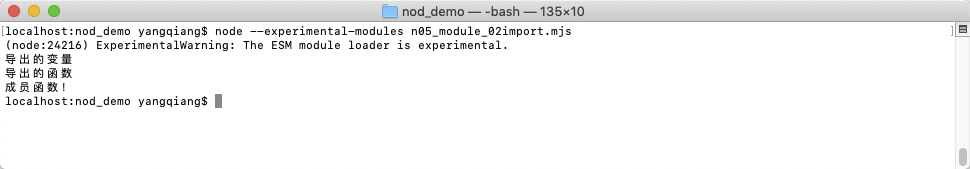

# NodeJs兼容ES6的模块化语法

- 怎样在Node.js中支持ES的import与export语法呢？ 利用第三方提供的模块可以实现：
    - 代码翻译：babel-register
    - 运行环境：babel-node 

## babel-register

### babel-register的安装

- 这么模块需要单独安装：
    - 安装指令：`npm install -g babel-register babel-preset-env --save-dev  --unsafe-perm`
        - 因为Mac OS系统需要权限，后面一个选项是方便处理安装权限。
    - 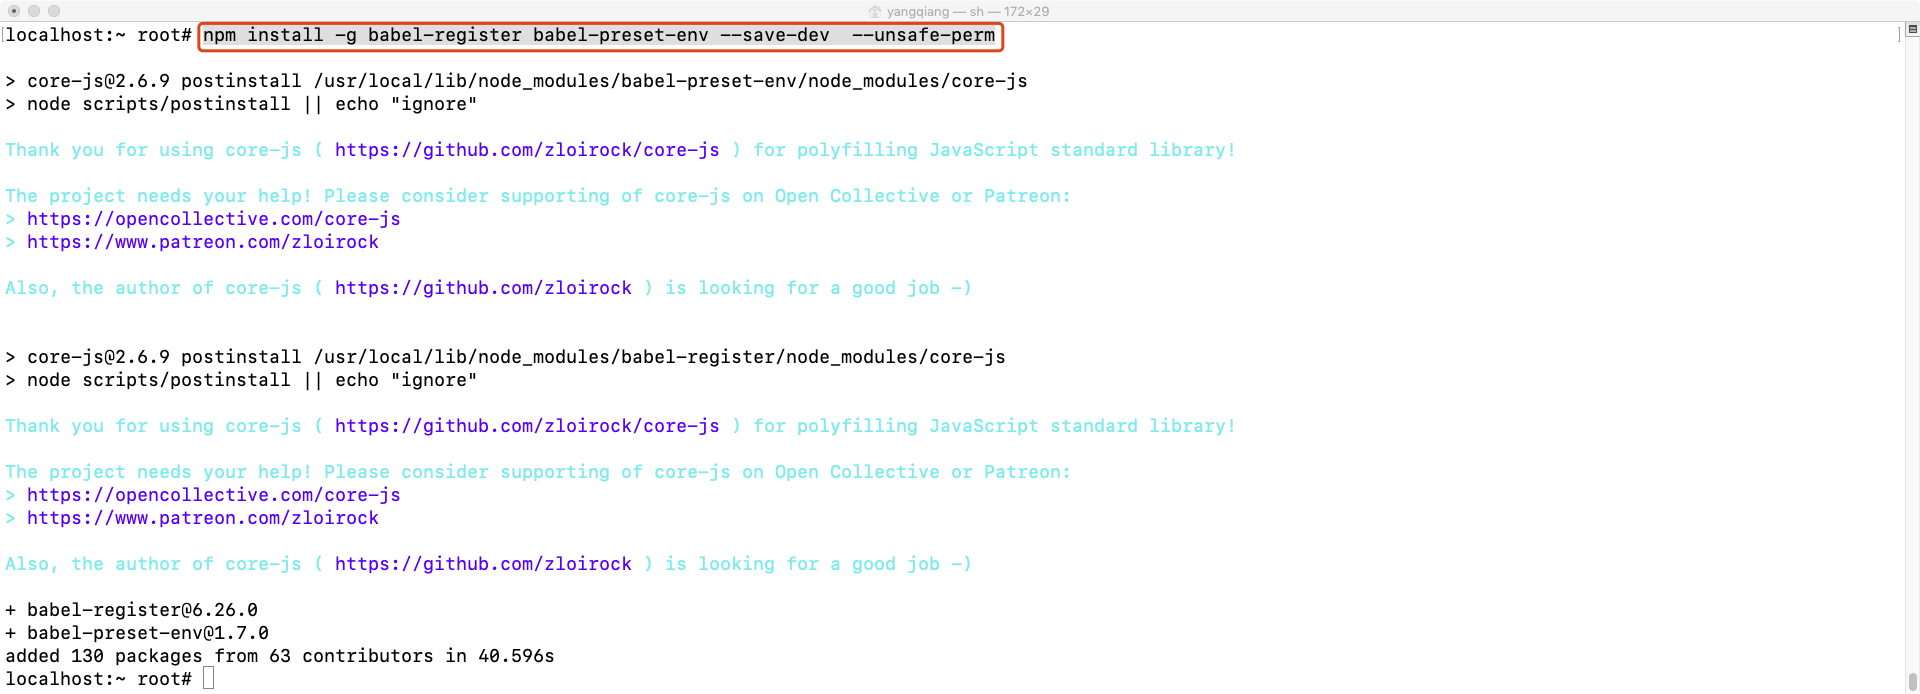

- 注意：
    - 上述环境如果安装在全局下无法使用，可以在工程目录下直接本地安装；
    - 全局安装找不到，需要设置系统环境变量；两种选择（需要理解node的模块查找机制）：
        - 设置环境NODE_PATH；(下面截图就是配置的系统安装路径)
        - 使用本地安装；

- 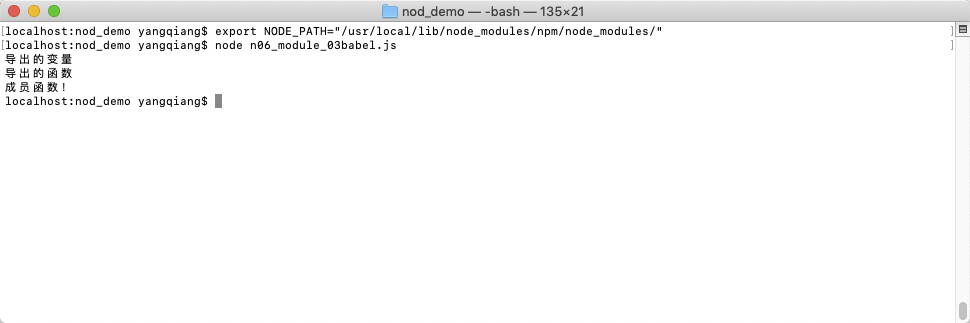

### babel-register使用的例子

- 我们借用全面的例子，完全按照ES6的语法实现模块化，然后再node.js下执行；
    - 注意问文件扩展名是js

1. 文件1：export

```javascript
    var v_a = "导出的变量";  

    function mod_func(){
        console.log("导出的函数");
    }

    function cls_a(){
        this.m_a = 20;
        this.func = function(){
            console.log("成员函数！");
        }
    }

    var obj_a = new cls_a();

    export default {
        mod_func,
        v_a,
        mod_cls:cls_a,
        mod_obj:obj_a
    }

    // 测试环境下不支持
    // export default{
    //     cls_a as mod_cls,
    //     obj_a as mod_obj
    // }

```

2. 文件2：import

```javascript
    import mod from "./n06_module_01export"

    console.log(mod.v_a);
    mod.mod_func();
    mod.mod_obj.func();

```

3. 文件3：使用label-register封装翻译

```javascript
    require('babel-register') ({
        presets: [ 'env' ]
    })
    module.exports = require('./n06_module_02import');

```

## babel-node 

- bael-node本质上与上面babel-register一样，只是使用的是命令行模式，这个命令需要安装babel-cli。
    - 好处就是不用编写一个封装js文件；
    - 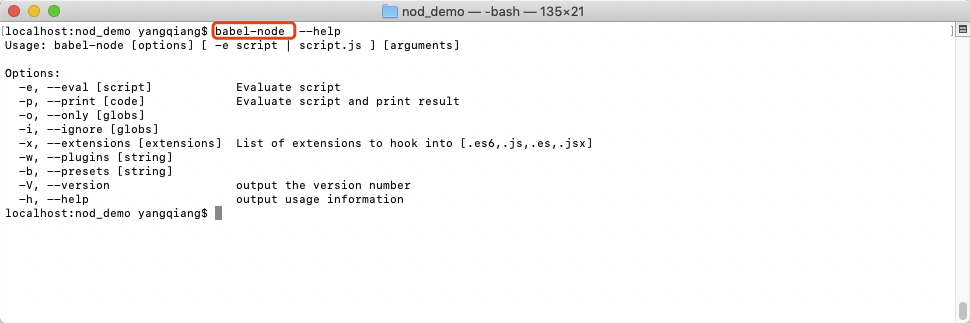

- 执行命令：
    - `babel-node --presets env 需要执行的js文件`
    - 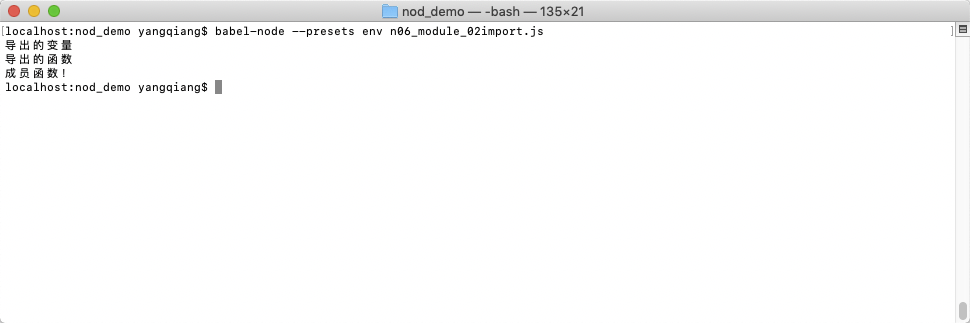

----